# <center> Retail Sales Data 


## Table of Contents
- [Data Wrangling](#wrangle)
- [Exploratory Data Analysis](#eda)
- [Conclusion](#Conclusion)

In [45]:
#import necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from itertools import combinations
from collections import Counter

<a id='wrangle'></a>
## <center> Data Wrangling 
### Gather Data

In [2]:
#unify 12 months of sales data into single file
path = "./Sales_Data"
files = [file for file in os.listdir(path)] # iterate over each file in folder 

all_months_data = pd.DataFrame() # create empty dataframe object

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False) #save newly created 'master' file

In [46]:
#read in unified datframe
df = pd.read_csv("all_data_copy.csv")

In [47]:
#inspect first five rows of dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [48]:
#number of columns and rows in dataframe
df.shape

(186850, 6)

**Observations:**

This dataframe contains 186,850 records (transactions) and 6 features (variables)

<a id='Assess'></a>
### Assess Data

In [6]:
#columns names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Observations:**

All six variables have been read as Python's default 'object' data type. This occurs when Python is unsure how to categorise data

In [49]:
#user defined function to calculate and display number missing values
def missing_values(df):
    '''
    Function that aggregates missing values values and creates an output table with two columns
    one with the count and the other a percentage of total values for that column.
    '''
    miss_val = df.isnull().sum()
    miss_val_perc = (df.isnull().sum() / len(df)) * 100
    miss_val_table = pd.concat([miss_val, miss_val_perc], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("The selected dataframe has a total of " + str(df.shape[1]) + " columns, of which " + str(miss_val_table_ren_columns.shape[0]) + " contain missing values.")
    return miss_val_table_ren_columns

In [50]:
missing_values(df)

The selected dataframe has a total of 6 columns, of which 6 contain missing values.


,Missing Values,% of Total Values
Order ID,545,0.3
Product,545,0.3
Quantity Ordered,545,0.3
Price Each,545,0.3
Order Date,545,0.3
Purchase Address,545,0.3


**Observations:**

All six variables have an equal number of missing values, suggesting recorded transactions without any real values 

In [51]:
#count of unique values Order Date column
df['Order Date'].value_counts()

Order Date        355
12/15/19 20:16      8
04/02/19 13:24      7
10/30/19 21:28      7
12/11/19 13:24      7
                 ... 
04/20/19 12:00      1
11/19/19 13:06      1
05/03/19 21:22      1
06/27/19 14:08      1
03/02/19 20:45      1
Name: Order Date, Length: 142396, dtype: int64

**Observations**:
    
The Order Date variable contains 355 instances of the string 'Order Date' when it should be a date values

### Summary

### Quality

**Observations:**

1. Data Types: Incorrectly labelled columns for Quantity Ordered, Price Each, and Order Date 
2. Missing Values: 545 records with missing values across all variables
3. Erroneous values: Order Date column has 355 records with value set to 'Order Date'

<a id='Clean'></a>
## Clean Data

In [52]:
#create a copy of dataframe
df_clean = df.copy()

In [53]:
#set Order Date column to index 
df_clean.set_index('Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
04/19/19 08:46,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
04/07/19 22:30,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
04/12/19 14:38,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
04/12/19 14:38,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...
09/17/19 20:56,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001"
09/01/19 16:00,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016"
09/23/19 07:39,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016"


**Define**

Change the data type for variables Quantity Ordered, Price Each and Order date to float and datetime objects respectively.

**Code**

In [54]:
#convert columns identified to correct data types
df_clean['Quantity Ordered'] = pd.to_numeric(df_clean['Quantity Ordered'], errors='coerce')
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'], errors='coerce')
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')

**Test**

In [56]:
##display column names, data types and missing values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.6+ MB


**Define**

drop empty records, i.e transactions with no data

**Code** 

In [57]:
#drop rows where data for all variables is missing
df_clean = df_clean.dropna()

**Test**

In [58]:
#check for missing values
df_clean.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**Define**

filter out erroneous rows from the 'Order Date" column, i.e invalid values 

**Code** 

In [60]:
#subset dataframe for only valid dates
df_clean = df_clean[df_clean['Order Date'] != 'Or']

**Test**

In [61]:
df_clean['Order Date'].value_counts()

2019-12-15 20:16:00    8
2019-10-30 21:28:00    7
2019-12-11 13:24:00    7
2019-04-02 13:24:00    7
2019-07-07 17:09:00    6
                      ..
2019-07-30 10:15:00    1
2019-11-11 11:22:00    1
2019-01-10 11:04:00    1
2019-05-18 07:56:00    1
2019-02-16 00:17:00    1
Name: Order Date, Length: 142395, dtype: int64

### Augment Data

In [62]:
#write function that extracts city from address
def get_city(address):
    return address.split(",")[1].strip(" ")

In [63]:
#write function that extracts state from address
def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [64]:
#extract City from address column
df_clean['City'] = df_clean['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [65]:
#visually inspect first five rows
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [66]:
#create new columns with Order Date broken down by year, month, day, weekday and hour
df_clean['year'] = pd.DatetimeIndex(df_clean['Order Date']).year
df_clean['month'] = pd.DatetimeIndex(df_clean['Order Date']).month
df_clean['day'] = pd.DatetimeIndex(df_clean['Order Date']).day
df_clean['weekday'] = pd.DatetimeIndex(df_clean['Order Date']).weekday
df_clean['hour'] = pd.DatetimeIndex(df_clean['Order Date']).hour

In [67]:
#visually inspect first five rows
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,year,month,day,weekday,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),2019,4,19,4,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),2019,4,7,6,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,30,1,9


In [68]:
#create new column sales by multiplyiung the price of each item by quantity ordered
df_clean['Sales'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [69]:
#visually inspect first five rows of final tableau
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,year,month,day,weekday,hour,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),2019,4,19,4,8,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),2019,4,7,6,22,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,30,1,9,11.99


<a id='eda'></a>
## <center> Exploratory Data Analysis
### Univarate Exploration

In [70]:
#descriptive statistics of numerical variables 
df_clean.describe()

,Quantity Ordered,Price Each,year,month,day,weekday,hour,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,15.759532,2.991482,14.413305,185.490917
std,0.442793,332.731330,0.013521,3.502996,8.782176,2.001968,5.423416,332.919771
min,1.000000,2.990000,2019.000000,1.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,8.000000,1.000000,11.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,16.000000,3.000000,15.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,23.000000,5.000000,19.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,3400.000000


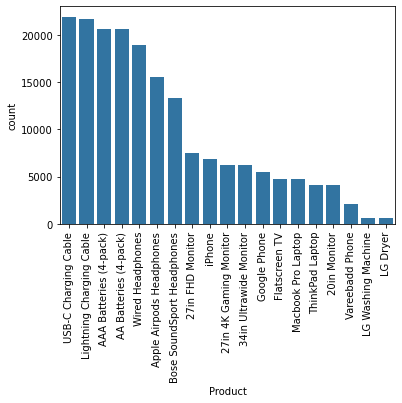

<Figure size 720x360 with 0 Axes>

In [74]:
#count of Product column
order = df_clean.Product.value_counts().index #programatically return list of sorted values
base_color = sns.color_palette() [0] # return color schema for first paltette
sns.countplot(data=df_clean, x='Product', color= base_color, order = order) #categorical data


plt.xticks(rotation=90) # shift labels to avoid overlap
plt.figure(figsize = [10, 5]); # larger figure size for subplots

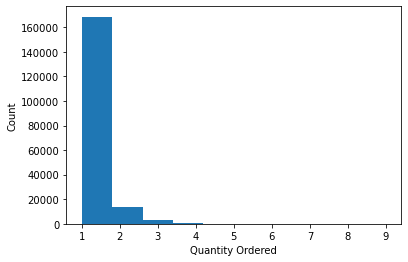

In [77]:
#histogram of Quantity Ordered
plt.hist(data= df_clean, x= 'Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Count');

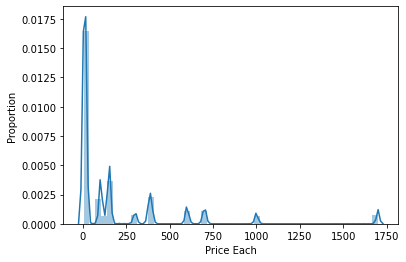

In [78]:
#distribution plot of Price Each
sns.distplot(df_clean['Price Each'])
plt.ylabel('Proportion');

<a id='be'></a>
### Bivariate Exploration

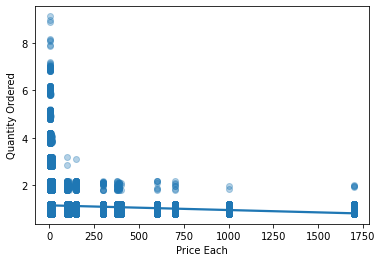

In [79]:
#regression plot of Price Each and Quantity Ordered
sns.regplot(data = df_clean, y = 'Quantity Ordered', x = 'Price Each', 
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

<a id='me'></a>
### Multivariate Exploration

C:\Users\noama\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


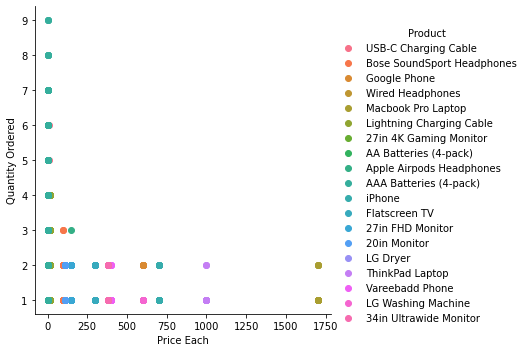

In [80]:
#color encoded third variable scatter plot
g = sns.FacetGrid(data = df_clean, hue = 'Product', size = 5)
g.map(plt.scatter, 'Price Each', 'Quantity Ordered')
g.add_legend();

**Observation(s):**

- Relatively inexpensive items like charging cables and batteries sell more frequently

<a id='Conclusion'></a>
## <center> Conclusion


### Store

In [81]:
# save cleaned DataFrame in a csv file
df.to_csv('./clean_retail.csv', index=False)

**Question 1**: What was the best month for sales? How much was earned that month?

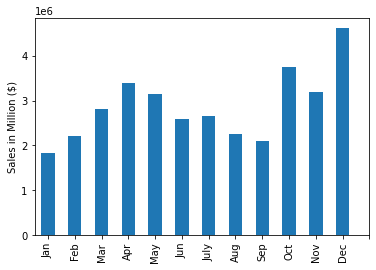

In [82]:
#aggregate by month and sum sales
df_clean.groupby('month').sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales in Million ($)')
plt.xlabel('')
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(0, 13), month);

In [83]:
#aggregate by month and return highest month by sales
df_clean.groupby('month').sum()['Sales'].max()

4613443.340001534

**Observations**:
    
- December was the month with the highest in sales. This may be due to the holiday season, when consumer products tend to sell well. 

**Question 2**: What was the best day of the month for sales?  How much was earned on that day?

In [84]:
#aggregate by day and return index of highest day by sales
df_clean.groupby('day').sum()[['Sales']].idxmax()

Sales    9
dtype: int64

In [85]:
#aggregate by day and return index of highest day by sales
df_clean.groupby('day').sum()[['Sales']].max()

Sales    1169250.43
dtype: float64

**Observations**:
    
- The 10th day of the month was the highest for sales. Pandos follows zero based indexing convention, which is why the value associated with Sales reads 9.

**Question 3**: What was the highest day of the week for sales? 

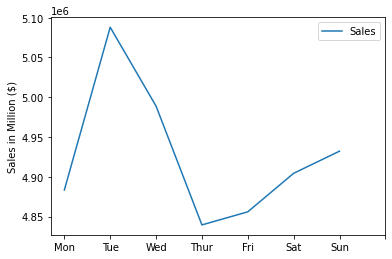

In [86]:
# aggregate by day of the week, sum sales and plot line chart 
df_clean.groupby('weekday').sum()[['Sales']].plot()
day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 8), day)
plt.xlabel('')
plt.ylabel('Sales in Million ($)');

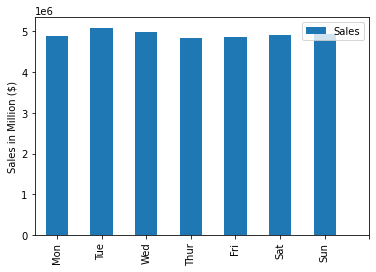

In [87]:
# aggregate by day of the week, sum sales and plot bar chart 
df_clean.groupby('weekday').sum()[['Sales']].plot(kind='bar')
day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 8), day)
plt.xlabel('')
plt.ylabel('Sales in Million ($)');

**Observations**:
    
- Although Tuesday has the highest in sales, the difference is small.

**Question 4**: Which City had the highest in sales?

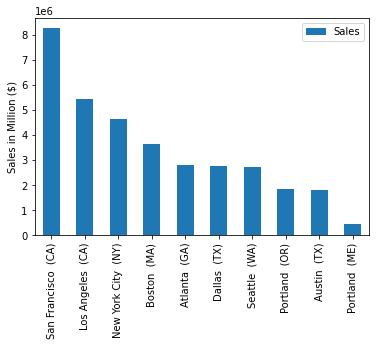

In [88]:
# aggregate by City, sum sales and plot bar chart 
df_clean.groupby('City').sum()[['Sales']].sort_values('Sales', ascending=False).plot(kind='bar')
plt.ylabel('Sales in Million ($)')
plt.xlabel('');

**Observations**:
    
- San Francisco (CA) is clearly a larger market than Portland (ME).

**Question 5**: What time of day had the highest sales?

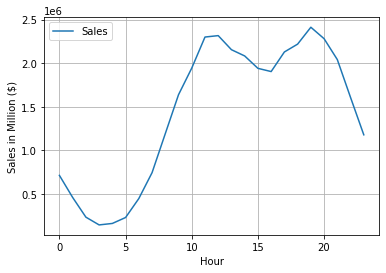

In [89]:
# aggregate by hour, sum sales and plot line chart 
df_clean.groupby('hour').sum()[['Sales']].plot()
plt.xlabel('Hour')
plt.ylabel('Sales in Million ($)')
plt.grid();

Observations:

- Bomodal distribution, with two peaks. The first at around 11 am and the second at around 7 pm.

**Question 6**: What products are most often sold together?

In [90]:
#subset the data for only transactions where multiple items were purchased
df_dup = df_clean[df_clean['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,year,month,day,weekday,hour,Sales
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,12,4,14,11.99
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,3,2,19,600.00
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),2019,4,3,2,19,11.95
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston (MA),2019,4,7,6,11,99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",Atlanta (GA),2019,9,20,4,20,3.84
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),2019,9,16,0,0,11.99
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),2019,9,16,0,0,5.98
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",San Francisco (CA),2019,9,30,0,13,600.00


In [91]:
# create column consisting of items purchased together by aggregating on transaction ID
df_dup['grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dup_clean = df_dup[['Order ID', 'grouped']].drop_duplicates()
df_dup_clean

C:\Users\noama\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [92]:
#count unique pairs of combinations
count = Counter() #create iterable object

#loop through each row in df, seperate by comma, and count number of combinations
for row in df_dup_clean['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

#print number of occurances of each combination
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Obervations**:

iPhone and the Lightning Charging Cable are most often sold together. 

**Question 7**: Which product made the most in sales? 

In [93]:
# aggregate by product and sum sales 
df_clean.groupby('Product').sum()[['Sales']].sort_values('Sales', ascending=False)

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


**Observations**:
    
-Relatively cheaper products sell more in terms of units, but bring in less in sales revenue.

### Summary

**Question 1**: What was the best month for sales? How much was earned that month?
> December, $4,613,443.34

APPLICATION: The firm may wish to consider the timing of marketing campaigns to coincide with peak/troughs in sales

**Question 2**: What was the best day of the month for sales? How much was earned on that day?
> 10th, $1,169,250.43

**Question 3**: What was the highest day of the week for sales?
> Tuesday. Although as the bar chart demonstrates, this difference is small

**Question 4**: Which City had the highest in sales?
> San Francisco (CA)

APPLICATION: Investing in certain geograhical regions may have a higher return on investment than others

**Question 5**: What time of day had the highest sales?
> Bimodal distribution, with peaks in sales observed at around 11 am & 7 pm

APPLICATION: Advertisements can be strategically placed to boost sales

**Question 6**: What products are most often sold together?
> The iPhone and Lightning Charging Cable are most often purchased together

APPLICATION: Marketing may decide to offer a bundle discount, or the store layout could be adjusted to make it seamless for customers to purchase these items, by placing them in close proximity to each other.

**Question 7**: Which product made the most in sales?
> Macbook Pro Laptop, with sales of $8,037,600